In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers,losses,datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.image as mpimg

In [2]:
img = mpimg.imread("ma.jpg")

In [3]:
print(img)

[[[219 219 207]
  [219 219 207]
  [220 220 208]
  ...
  [196 198 185]
  [196 198 185]
  [197 199 186]]

 [[220 220 208]
  [220 220 208]
  [220 220 208]
  ...
  [197 199 186]
  [197 199 186]
  [197 199 186]]

 [[221 221 209]
  [221 221 209]
  [221 221 209]
  ...
  [198 200 187]
  [197 199 186]
  [197 199 186]]

 ...

 [[ 46  80 107]
  [ 49  83 110]
  [ 52  86 113]
  ...
  [ 24  43  58]
  [ 18  37  52]
  [ 14  33  48]]

 [[ 63  97 124]
  [ 66 100 127]
  [ 68 102 129]
  ...
  [ 25  44  59]
  [ 19  38  53]
  [ 15  34  49]]

 [[ 81 115 142]
  [ 81 115 142]
  [ 79 113 140]
  ...
  [ 24  43  58]
  [ 24  43  58]
  [ 25  44  59]]]


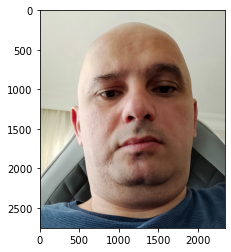

In [4]:
plt.imshow(img, cmap="Greys")

Label: 4


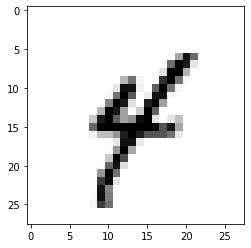

In [6]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()
plt.imshow(train_images[61],cmap="Greys")
print("Label:",train_labels[61])

In [7]:
shape_size=28*28
train_images=train_images.reshape(-1,shape_size)/255.0
test_images=test_images.reshape(-1,shape_size)/255.0

In [8]:
model = Sequential([
    Dense(shape_size, activation=tf.nn.relu,input_shape=(shape_size,),
          name="Inputs"),
    Dense(shape_size/2,activation=tf.nn.relu,input_shape=(shape_size,),
          name="Hidden1"),
    Dropout(0.2,name="Dropou1"),
    Dense(shape_size/4, activation=tf.nn.relu, input_shape=(shape_size/2,),
          name="Hidden2"),
    Dropout(0.2,name="Dropout2"),
    Dense(10, activation=tf.nn.softmax,name="Output")
])

model.compile(optimizer=optimizers.Adam(),
              loss=losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (Dense)               (None, 784)               615440    
_________________________________________________________________
Hidden1 (Dense)              (None, 392)               307720    
_________________________________________________________________
Dropou1 (Dropout)            (None, 392)               0         
_________________________________________________________________
Hidden2 (Dense)              (None, 196)               77028     
_________________________________________________________________
Dropout2 (Dropout)           (None, 196)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1970      
Total params: 1,002,158
Trainable params: 1,002,158
Non-trainable params: 0
______________________________________________

In [9]:
model.fit(train_images, train_labels, 
          epochs = 16,
          validation_data = (test_images,test_labels))

loss, acc = model.evaluate(test_images, test_labels)

print("Trained model, accuracy: {:5.2f}".format(100*acc))

Epoch 1/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2129 - accuracy: 0.9344 - val_loss: 0.1074 - val_accuracy: 0.9671
Epoch 2/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0973 - accuracy: 0.9717 - val_loss: 0.0933 - val_accuracy: 0.9739
Epoch 3/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9785 - val_loss: 0.0759 - val_accuracy: 0.9781
Epoch 4/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0560 - accuracy: 0.9836 - val_loss: 0.0872 - val_accuracy: 0.9750
Epoch 5/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0476 - accuracy: 0.9858 - val_loss: 0.0867 - val_accuracy: 0.9784
Epoch 6/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9877 - val_loss: 0.0754 - val_accuracy: 0.9823
Epoch 7/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0387 - accuracy: 0.9885 - val_loss: 0.0858 - val_accuracy:

In [10]:
model.save('modelim.h5')

In [11]:
modell = keras.models.load_model('modelim.h5')

modell.summary()
loss, acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (Dense)               (None, 784)               615440    
_________________________________________________________________
Hidden1 (Dense)              (None, 392)               307720    
_________________________________________________________________
Dropou1 (Dropout)            (None, 392)               0         
_________________________________________________________________
Hidden2 (Dense)              (None, 196)               77028     
_________________________________________________________________
Dropout2 (Dropout)           (None, 196)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1970      
Total params: 1,002,158
Trainable params: 1,002,158
Non-trainable params: 0
______________________________________________

Label : 1  Predict : 1


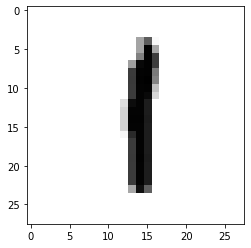

In [21]:
image_index=663
pred = model.predict(test_images[image_index].reshape(-1,shape_size))

plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
print("Label :",test_labels[image_index]," Predict :",pred.argmax())

In [22]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img 

In [69]:
def load_image(filename):
    img = load_img(filename,color_mode = "grayscale",target_size=(28, 28))
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

In [70]:
modeln = keras.models.load_model('modelim.h5')
modeln.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (Dense)               (None, 784)               615440    
_________________________________________________________________
Hidden1 (Dense)              (None, 392)               307720    
_________________________________________________________________
Dropou1 (Dropout)            (None, 392)               0         
_________________________________________________________________
Hidden2 (Dense)              (None, 196)               77028     
_________________________________________________________________
Dropout2 (Dropout)           (None, 196)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1970      
Total params: 1,002,158
Trainable params: 1,002,158
Non-trainable params: 0
______________________________________________

 Predict : 5


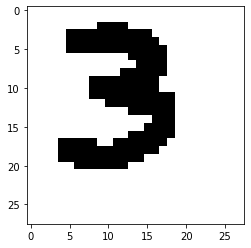

In [86]:
quary_img=load_image("3.png")
pred = modeln.predict(quary_img.reshape(-1,28*28))
print(" Predict :",pred.argmax())

In [87]:
pred.argsort()

array([[8, 2, 4, 1, 9, 0, 3, 6, 7, 5]], dtype=int64)